<a href="https://colab.research.google.com/github/TanviDeore/newsClassifiermodel/blob/main/NewsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=a2f7cd8bab81525fc423af2fe4e05e9747245b8c874303a24025f6110b4a5442
  Stored in directory: /root/.cache/pip/wheels/9f/af/22/bf406f913dc7506a485e60dce8143741abd0a92a19337d83a3
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.17
    Uninstalling kaggle-1.6.17:
      Successfully uninstalled kaggle-1.6.17


In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"tanvideore","key":"f925c13a9a8e6a4489a9243c898ad727"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download rmisra/news-category-dataset

Dataset URL: https://www.kaggle.com/datasets/rmisra/news-category-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
news-category-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile

In [ ]:
file_name = "news-category-dataset.zip"

In [ ]:
with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done!')

Done!


In [ ]:
import pandas as pd
from pathlib import Path
import json
import shutil

In [ ]:
df = pd.read_json('/content/News_Category_Dataset_v3.json',lines=True)
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [ ]:
# reading the json file
with open('/content/News_Category_Dataset_v3.json') as f:
    data = [json.loads(line) for line in f]



In [ ]:
# creating the dataframe
dataframe = pd.json_normalize(data)

# converted a file to csv
df.to_csv('news_classification.csv', encoding='utf-8', index=False)

In [ ]:
pd.read_csv('/content/news_classification.csv')

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",NaN,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",NaN,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,NaN,2012-01-28


In [ ]:
df.to_csv('news_classification_model.csv', encoding='utf-8', index=False)

In [ ]:
df.shape

(44986, 2)

In [ ]:
df.isna().sum()

,0
link,0
headline,0
category,0
short_description,0
authors,0
date,0


In [ ]:
df.head(10)

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
5,https://www.huffpost.com/entry/belk-worker-fou...,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...,,2022-09-22
6,https://www.huffpost.com/entry/reporter-gets-a...,Reporter Gets Adorable Surprise From Her Boyfr...,U.S. NEWS,"""Who's that behind you?"" an anchor for New Yor...",Elyse Wanshel,2022-09-22
7,https://www.huffpost.com/entry/puerto-rico-wat...,Puerto Ricans Desperate For Water After Hurric...,WORLD NEWS,More than half a million people remained witho...,"DÁNICA COTO, AP",2022-09-22
8,https://www.huffpost.com/entry/mija-documentar...,How A New Documentary Captures The Complexity ...,CULTURE & ARTS,"In ""Mija,"" director Isabel Castro combined mus...",Marina Fang,2022-09-22
9,https://www.huffpost.com/entry/biden-un-russia...,Biden At UN To Call Russian War An Affront To ...,WORLD NEWS,White House officials say the crux of the pres...,"Aamer Madhani, AP",2022-09-21


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**DIRECT SAVED DATA**

In [ ]:
'''
import pandas as pd
path = '/content/drive/MyDrive/Colab Notebooks/news_final.csv'
df = pd.read_csv(path)
df.drop(['text'],axis =1)
'''

"\nimport pandas as pd\npath = '/content/drive/MyDrive/Colab Notebooks/news_final.csv'\ndf = pd.read_csv(path)\ndf.drop(['text'],axis =1)\n"

In [ ]:

# import pandas as pd
# path  = '/content/drive/MyDrive/Colab Notebooks/news_40k'
# df = pd.read_csv(path)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/news_40k'

In [ ]:

shutil.copy('news_classification.csv','/content/drive/MyDrive/Colab Notebooks/news_classification.csv')

'/content/drive/MyDrive/Colab Notebooks/news_classification.csv'

In [ ]:
df['text'] = df[['headline','short_description']].agg(' '.join, axis=1)

KeyError: "None of [Index(['headline', 'short_description'], dtype='object')] are in the [columns]"

In [ ]:
df.head(10)

,category,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,WORLD NEWS,South Korean President Meets North Korea's Kim...
2,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...
3,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...
4,POLITICS,Edward Snowden: There's No One Trump Loves Mor...
5,POLITICS,Booyah: Obama Photographer Hilariously Trolls ...
6,POLITICS,Ireland Votes To Repeal Abortion Amendment In ...
7,POLITICS,Ryan Zinke Looks To Reel Back Some Critics Wit...
8,POLITICS,Trump's Scottish Golf Resort Pays Women Signif...
9,WORLD NEWS,North Korea Still Open To Talks After Trump Ca...


In [ ]:

delete_list = ["authors","link","date","headline","short_description"]
for x in delete_list:
  del df[x]
delete_row_list = ["EDUCATION","ARTS","CRIME","POLITICS","WORLD NEWS"]
for x in df["category"]:
  if x not in delete_row_list:
    df.drop(df.index[(df["category"] == x)],axis=0,inplace=True)

In [ ]:
df.to_csv('news_40k.csv', encoding='utf-8', index=False)
shutil.copy('news_40k.csv','/content/drive/MyDrive/Colab Notebooks/news40k.csv')

'/content/drive/MyDrive/Colab Notebooks/news40k.csv'

In [ ]:
#df= df.groupby('category').head(500)

In [ ]:
df.shape

(44986, 2)

In [ ]:
df.duplicated()


,0
7,False
9,False
10,False
11,False
12,False
...,...
207483,False
207545,False
208133,False
208134,False


In [ ]:
df.drop_duplicates(keep=False,inplace=True)

In [ ]:
df.shape

(44940, 2)

In [ ]:
df = df.sort_values(by=["category"])

In [ ]:
print(df["category"].unique())

['ARTS' 'CRIME' 'EDUCATION' 'POLITICS' 'WORLD NEWS']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44940 entries, 106943 to 7
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  44940 non-null  object
 1   text      44940 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [ ]:
#making copy of dataframe
mf = df
mf.shape
#['ARTS' 'CRIME' 'EDUCATION' 'POLITICS' 'WORLD NEWS']

(44940, 2)

**SPLITTING DATA**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(mf['text'], mf['category'],test_size=0.2,random_state = 10)

In [ ]:
print("shape of original dataset :", mf.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)
y_train.unique()

shape of original dataset : (44940, 2)
shape of input - training set (35952,)
shape of output - training set (35952,)
shape of input - testing set (8988,)
shape of output - testing set (8988,)


array(['POLITICS', 'ARTS', 'EDUCATION', 'WORLD NEWS', 'CRIME'],
      dtype=object)

**RECORDS AVAILABLE**

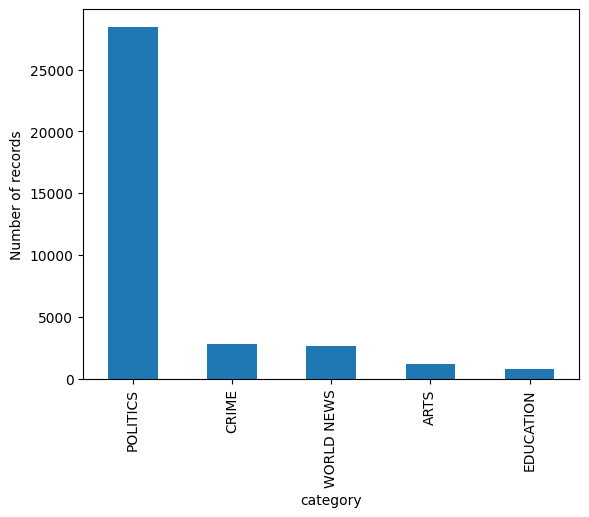

In [ ]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('category')
plt.show()

In [ ]:
pip install scikit-plot

In [ ]:
import spacy
from spacy import displacy
from  spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import en_core_web_sm
import string
import nltk

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
stopwords = list(STOP_WORDS)
print(stopwords[:100])

['she', 'take', 'can', 'ours', 'name', 'whence', 'third', 'least', 'anyone', 'ever', 'due', 'hereafter', 'am', 'hers', 'throughout', 're', 'had', 'nobody', 'too', 'between', 'done', '’s', 'that', 'hence', 'whose', 'other', 'it', 'so', "'s", 'five', 'thereby', 'these', 'further', 'here', 'else', 'keep', 'more', '’re', 'out', 'although', 'only', 'becoming', 'herself', 'less', 'within', 'hereby', 'four', 'were', 'several', 'wherein', "n't", 'himself', 'will', 'twenty', 'became', 'nine', 'very', 'using', 'former', 'all', 'along', 'me', 'anything', 'n‘t', 'anyhow', 'hereupon', 'sometime', 'therein', 'used', 'because', 'whereupon', 'eight', 'fifty', 'various', 'yourself', 'nevertheless', '’ll', 'almost', '’ve', 'neither', 'what', 'into', 'now', 'where', 'full', 'why', 'own', 'none', 'noone', 'give', 'once', 'amongst', 'thus', 'see', 'above', 'sometimes', 'otherwise', 'becomes', 'via', 'much']


In [ ]:
# Remove / and - from punctuations for dates
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


**convert to tokens**

In [ ]:
# Function to tokenise the text
def tokeniser(sentence):

    # Process the text
    doc = nlp(sentence)
    print(doc)

    # Rule 1
    # Convert tokens to lemma form for all except '-PRON-'
    # Remember (from SpaCy introduction) : Tokens like I, my, me were represented as '-PRON-' by lemma attribute
    tokens = [ token.lemma_.lower().strip() if token.lemma_ != "-PRON-" else token.lower_ for token in doc ]

    # Rule 2
    # Remove stop words and punctuation
    tokens = [ token for token in tokens if token not in stopwords and token not in punctuations ]
    print(tokens)
    return tokens

In [ ]:
tfvectorizer = TfidfVectorizer(tokenizer = tokeniser)

In [ ]:
df.isna().sum()

,0
category,0
text,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(44940, 2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
classifier_NB = MultinomialNB()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
# Create the  pipeline to clean, tokenize, vectorize, and classify using"Count Vectorizor"
# Multiple models can be added to the Pipeline object to be executed in sequence.
model_pipe_NB = Pipeline( [ ('vectorizer', tfvectorizer),
                         ('classifier', classifier_NB) ] )

Fit the model

In [ ]:
model_pipe_NB.fit(x_train.values.astype('U'),y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Streaming output truncated to the last 5000 lines.
trump’s 'beachhead' teams host dozens of former lobbyists by ashley balcerzak and niv sultan health and human services secretary tom price has been mired in questions about his investments
['trump', 'beachhead', 'team', 'host', 'dozen', 'lobbyist', 'ashley', 'balcerzak', 'niv', 'sultan', 'health', 'human', 'service', 'secretary', 'tom', 'price', 'mire', 'question', 'investment']
finding art in everyday life 
['find', 'art', 'everyday', 'life']
tom cotton insists trump didn’t say ‘shithole’ but refuses to reveal what word he did use “i stand by every word i said. the difference is, i’m right," the republican senator says.
['tom', 'cotton', 'insist', 'trump', 'shithole', 'refuse', 'reveal', 'word', 'use', 'stand', 'word', 'difference', 'right', 'republican', 'senator']
responsible gun ownership we've fallen into the belief and practice of thinking that our personal points of view are true and have no space for other views. are we so igno

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function tokeniser at 0x7c5967533520>)),
                ('classifier', MultinomialNB())])

In [ ]:
# Accuracy
print("Train Accuracy: ", model_pipe_NB.score(x_train.values.astype('U'), y_train))

# Accuracy
print("Test Accuracy: ", model_pipe_NB.score(x_test.values.astype('U'), y_test))

Train Accuracy:  0.8349166462368227
Test Accuracy:  0.8226280951213533


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier_NB = RandomForestClassifier()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
# Create the  pipeline to clean, tokenize, vectorize, and classify using"Count Vectorizor"
# Multiple models can be added to the Pipeline object to be executed in sequence.
model_pipe_NB = Pipeline( [ ('vectorizer', tfvectorizer),
                         ('classifier', classifier_NB) ] )

In [ ]:
model_pipe_NB.fit(x_train.values.astype('U'),y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

**PREDICT VALUES**

In [ ]:
preds_RF = model_pipe_NB.predict(x_test.values)

In [ ]:
print("Train Accuracy: ", model_pipe_NB.score(x_train.values.astype('U'), y_train))

# Accuracy
print("Test Accuracy: ", model_pipe_NB.score(x_test.values.astype('U'), y_test))

**CONFUSION MATRIX**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
conf_matrix = confusion_matrix(y_test,preds_RF)

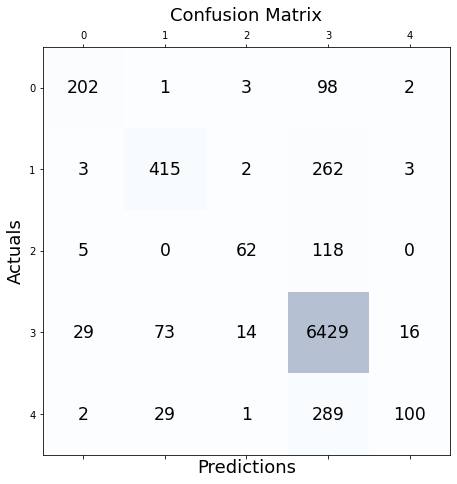

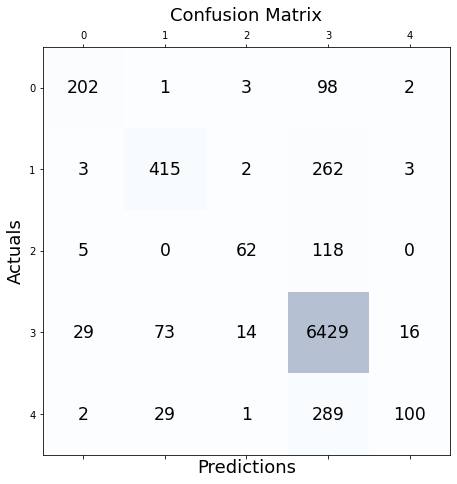

In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
output = pd.DataFrame({'Id': x_test.index,
                       'Category': preds_RF})
output.to_csv('submission.csv', index=False)

**UNDERSAMPLING**

In [ ]:
# class count
politics_count, crime_count,world_news_count,arts_count,education_count = df['category'].value_counts()


# Separate class
arts =df[df['category'] =='ARTS']
crime =df[df['category'] =='CRIME']
education= df[df['category'] =='EDUCATION']
politics = df[df['category'] =='POLITICS']
world_news = df[df['category']=='WORLD NEWS']# print the shape of the class
print('class arts:', arts.shape)
print('class crime:', crime.shape)
print('class education:', education.shape)
print('class politics:', politics.shape)
print('class world_news:', world_news.shape)

ValueError: ignored

In [ ]:
arts.head(2)

,category,text
36407,ARTS,10 Budget-Friendly Street Photography Books
33819,ARTS,The Composers Speak: Broadway Composers Partic...


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = df['text']
y = df['category']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
strategy = {0:100, 1:100, 2:200, 3:200, 4:200, 5:200}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X.value_counts(), y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

ValueError: ignored

**undersampling politics category**

In [ ]:

import pandas as pd
path  = '/content/drive/MyDrive/Colab Notebooks/news40k.csv'
df = pd.read_csv(path)

In [ ]:
import numpy as np

politics_under = np.random.choice(arts_count,politics_count, replace=True)

mf =  pd.dataframe([arts, crime,education,politics_under,world_news])
#convert array to dataframe and perform it on whole data 40k file


TypeError: ignored

In [ ]:
mf.head(5)

,0
0,category ...
1,category ...
2,category ...
3,"[541, 727, 978, 844, 1152, 958, 693, 597, 740,..."
4,category ...


In [ ]:
import nltk
import spacy
from spacy import displacy
from  spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import en_core_web_sm
import string
import nltk
nltk.download('stopwords');
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#converting text to lowercase
df['text'] = df['text'].str.lower()

In [ ]:
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
nlp = spacy.load('en_core_web_sm')
#converting to tokens

def identify_tokens(row):
    text = nlp(row)
    # taken only words (not punctuation)
    token_words = [w for w in text if w.isalpha()]
    # taken only words (not stopwords)
    token_words = [w for w in text if w not in stop_words]
    return token_words


df['text'] = df.apply(identify_tokens, axis=1)

**delete lower cell**

In [ ]:
# Spliting dataframe into x and y
y = df['category']
X = df['text']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], train_size=0.2, shuffle=True, random_state=1)

In [ ]:
 # Fit a tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#tfvectorizer = TfidfVectorizer(tokenizer = identify_tokens)

In [ ]:

from sklearn.pipeline import Pipeline

In [ ]:
#splitting model
X_train, X_test, y_train, y_test = train_test_split( df['text'], df['category'],
                                                    test_size = 0.2, random_state = 678)
from sklearn.naive_bayes import MultinomialNB
classifier_NB = MultinomialNB()

In [ ]:
model_pipe_NB = Pipeline( [ ('vectorizer', tfvectorizer),
                         ('classifier', classifier_NB) ] )

In [ ]:
model_pipe_NB.fit(X_train,y_train)

TypeError: ignored

In [ ]:
'''import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
for sentence in df["text"]:
  doc = nlp(sentence)
  print([(X.text, X.label_) for X in doc.ents])
'''

[('house', 'ORG')]
[('three years', 'DATE')]
[]
[('etgar keret examines life', 'PERSON'), ('israel', 'GPE')]
[]
[('a day', 'DATE')]
[('massart', 'ORG'), ('boston', 'GPE')]
[('hungarian', 'NORP')]
[]
[('trisha williams', 'PERSON')]
[("new york's", 'GPE')]
[]
[('2.0', 'CARDINAL')]
[]
[]
[('london', 'GPE')]
[]
[]
[('gloria', 'PERSON')]
[('world', 'ORG')]
[("anish kapoor's", 'PERSON')]
[]
[]
[('this summer', 'DATE')]
[]
[('art basel', 'PERSON'), ('basel 2015', 'DATE')]
[("yoko ono's", 'PERSON')]
[('max ginsburg', 'PERSON')]
[('5', 'CARDINAL'), ('2015', 'DATE')]
[("yiddish-wong-ish --it's", 'GPE')]
[("b'way", 'CARDINAL'), ('35', 'CARDINAL')]
[]
[("the royal shakespeare company's", 'ORG'), ('venice', 'GPE')]
[]
[('today', 'DATE')]
[('bosque', 'GPE')]
[]
[]
[]
[('america', 'GPE')]
[('summer', 'DATE'), ('bingo', 'PERSON'), ('summer', 'DATE')]
[('david ligare', 'PERSON'), ('the crocker art museum', 'ORG'), ('sacramento', 'GPE')]
[]
[]
[]
[]
[]
[('san francisco', 'GPE')]
[('the fourth of july', 

In [ ]:
#df.to_csv('news_classification_model_final.csv', encoding='utf-8', index=False)

In [ ]:
#shutil.copy('news_classification_model_final.csv','/content/drive/MyDrive/Colab Notebooks/news_final.csv')

'/content/drive/MyDrive/Colab Notebooks/news_final.csv'

In [ ]:
#new column
df["lable"] = ""

In [ ]:
import spacy
import os
## call model
ner = spacy.load('en_core_web_lg')
## tag text
txt = df["text"].iloc[0]
doc = ner(txt)
## display result
spacy.displacy.render(doc, style="ent")

In [ ]:
## tag text and exctract tags into a list
df["lable"] = df["words"].apply(lambda x: [(tag.text, tag.label_)
                                for tag in ner(x).ents] )

In [ ]:
## tag text and exctract tags into a list
dtf["tags"] = dtf["text"].apply(lambda x: [(tag.text, tag.label_)
                                for tag in ner(x).ents] )

**process words**

In [ ]:
import spacy
from spacy import displacy
from  spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import en_core_web_sm
import string
import nltk

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
stopwords = list(STOP_WORDS)
print(stopwords[:])
punctuations = string.punctuation
print(punctuations)

['can', 'however', 'him', 'therein', 'elsewhere', 'perhaps', 'latterly', 'eight', 'you', 'beforehand', 'more', 'both', 'first', 'had', 'on', 'twelve', 'themselves', 'may', 'otherwise', 'has', 'whither', 'will', 'becoming', 'per', 'wherein', 'many', 'ourselves', 'made', 'please', 'although', 'four', 'some', "'s", 'himself', 'where', 'whereupon', 'becomes', 'this', 'out', 'indeed', 'thus', 'our', 'else', 'around', 'anywhere', 'my', 'thereby', 'nothing', 'from', 'amount', 'we', 'about', 'too', 'when', '‘d', 'after', 'could', 'its', 'behind', 'to', 'formerly', 'serious', 'eleven', 'through', 'is', 'most', 'somehow', 'fifty', 'thence', 'give', "n't", 'that', 'make', 'myself', 'seem', 'i', 'but', 'several', 'also', 'moreover', 'rather', 'another', 'enough', 'always', 'it', 'what', 'full', 'thru', 'together', 'well', 'be', 'would', 'upon', 'move', 'therefore', 'why', 'other', 'whom', 'throughout', 'others', 'not', 'everywhere', 'does', 'wherever', '’ll', 'hundred', 'those', 'own', 'whereas', 

In [ ]:
# Function to tokenise the text
def tokeniser(sentence):

    # Process the text
    doc = nlp(sentence)

    # Rule 1
    # Convert tokens to lemma form for all except '-PRON-'
    # Remember (from SpaCy introduction) : Tokens like I, my, me were represented as '-PRON-' by lemma attribute
    tokens = [ token.lemma_.lower().strip() if token.lemma_ != "-PRON-" else token.lower_ for token in doc ]

    # Rule 2
    # Remove stop words and punctuation
    tokens = [ token for token in tokens if token not in stopwords and token not in punctuations ]

    return tokens

In [ ]:
tfvectorizer = TfidfVectorizer(tokenizer = tokeniser)

In [ ]:
df.shape
df.isna().sum()

category    0
text        0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( df['category'], df['text'],
                                                    test_size = 0.2, random_state = 100)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
classifier_NB = MultinomialNB()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
model_pipe_NB = Pipeline( [ ('vectorizer', tfvectorizer),
                         ('classifier', classifier_NB) ] )

In [ ]:
model_pipe_NB.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokeniser at 0x7fead908b8c0>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False

In [ ]:
preds = model_pipe_NB.predict(X_test)

In [ ]:
# Accuracy
print("Train Accuracy: ", model_pipe_NB.score(X_train, y_train))

# Accuracy
print("Test Accuracy: ", model_pipe_NB.score(X_test, y_test))

Train Accuracy:  0.0035
Test Accuracy:  0.0


In [ ]:
import pickle

In [ ]:
filename = 'NB_model_5cat_data.sav'
pickle.dump(model_pipe_NB, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

Predict on test data

In [ ]:
preds = model_pipe_NB.predict(X_test)

In [ ]:
preds[:10]

array(['"How Do Asian Americans Advocate for Equality Without Throwing Other People of Color Under the Bus?"',
       '"Age Shall Not Weary Them" - Shakespeare and Memorial Day',
       '"How Do Asian Americans Advocate for Equality Without Throwing Other People of Color Under the Bus?"',
       'The Rest Of The World Showed Up To March For Our Lives',
       '#MeToo In The Statehouse: At Least 16 Men Are Gone, But The Harassment Culture Isn’t',
       '"How Do Asian Americans Advocate for Equality Without Throwing Other People of Color Under the Bus?"',
       '#MeToo In The Statehouse: At Least 16 Men Are Gone, But The Harassment Culture Isn’t',
       '"How Do Asian Americans Advocate for Equality Without Throwing Other People of Color Under the Bus?"',
       '"Age Shall Not Weary Them" - Shakespeare and Memorial Day',
       '"How Do Asian Americans Advocate for Equality Without Throwing Other People of Color Under the Bus?"'],
      dtype='<U181')

In [ ]:
X_test[:10]

55159     EDUCATION
92847          ARTS
19231     EDUCATION
7510     WORLD NEWS
434        POLITICS
36616     EDUCATION
913        POLITICS
26219     EDUCATION
92954          ARTS
19157     EDUCATION
Name: category, dtype: object

In [ ]:
y_test[:10]

55159    How to Answer the Common Application Essay for...
92847    Inside The Strange And Beautiful Bromance Of D...
19231    Circle Up: Teaching Social-Emotional Skills Ye...
7510     Myanmar And Bangladesh Establish 2-Year Timefr...
434      Federal Prosecutors Still Trying To Turn Trump...
36616    Donald Trump Says Our Schools Are 'Flush With ...
913      Mitch McConnell Mocks Blankenship On Twitter W...
26219                                   No Excuse Teaching
92954    Relating to Race Over Dinner: "Memphis" in For...
19157    Inspired By Skid Row, Educator Opening Charter...
Name: text, dtype: object

Compute accuracy

In [ ]:
# Accuracy
print("Train Accuracy: ", model_pipe_NB.score(X_train, y_train))

# Accuracy
print("Test Accuracy: ", model_pipe_NB.score(X_test, y_test))

Train Accuracy:  0.0035
Test Accuracy:  0.0


https://www.kaggle.com/jeffd23/10-classifier-showdown-in-scikit-learn